This project serves as my final project for the Machine Learning course. The core objective of this work is to answer this question: Are salaries something that we could predict? 

The project is structured to follow a clear and professional workflow: beginning with an initial analysis of the data, then moving on to preprocessing and some feature engineering ideas. 

From there, I'll implement three different machine learning models to identify the most effective one for this task. 

My goal is to deliver a solution that demonstrates a strong understanding of applied machine learning principles and figure it out if can salaries be predicted or they depend in any other things that we can't measure?

# Import data

In [67]:
import pandas as pd

In [68]:
df = pd.read_csv('/Users/carlostorres/Desktop/salaries.csv')

In [69]:
df.shape

(2682, 8)

In [70]:
df.head(10)

,kjønn,utdanning,erfaring,arbeidssted,arbeidssituasjon,fag,lønn,bonus?
0,mann,4,7,Agder,"in-house, privat sektor",AI / maskinlæring,865000,Nei
1,mann,5,2,Nordland,"in-house, offentlig/kommunal sektor",AI / maskinlæring,756000,Nei
2,mann,4,30,Oslo,konsulent,AI / maskinlæring,1500000,Nei
3,mann,5,25,Oslo,konsulent,AI / maskinlæring,1200000,Nei
4,mann,9,18,Oslo,"in-house, privat sektor",AI / maskinlæring,1200000,Nei
5,mann,2,14,Oslo,"in-house, privat sektor",AI / maskinlæring,839000,Nei
6,kvinne,5,9,Oslo,konsulent,AI / maskinlæring,1200000,Ja
7,mann,6,9,Oslo,"in-house, privat sektor",AI / maskinlæring,980000,Ja
8,annet / ønsker ikke oppgi,5,5,Oslo,"in-house, privat sektor",AI / maskinlæring,750000,Nei
9,mann,5,5,Oslo,konsulent,AI / maskinlæring,910000,Nei


## Translate data

In [71]:
df = df.rename(columns={
    'kjønn': 'gender',
    'utdanning': 'education_level',
    'erfaring': 'experience_years',
    'arbeidssted': 'region',
    'arbeidssituasjon': 'employment_type',
    'fag': 'field',
    'lønn': 'salary',
    'bonus?': 'bonus'
})

In [72]:
df.head()

,gender,education_level,experience_years,region,employment_type,field,salary,bonus
0,mann,4,7,Agder,"in-house, privat sektor",AI / maskinlæring,865000,Nei
1,mann,5,2,Nordland,"in-house, offentlig/kommunal sektor",AI / maskinlæring,756000,Nei
2,mann,4,30,Oslo,konsulent,AI / maskinlæring,1500000,Nei
3,mann,5,25,Oslo,konsulent,AI / maskinlæring,1200000,Nei
4,mann,9,18,Oslo,"in-house, privat sektor",AI / maskinlæring,1200000,Nei


# Exploratory Data Analysis

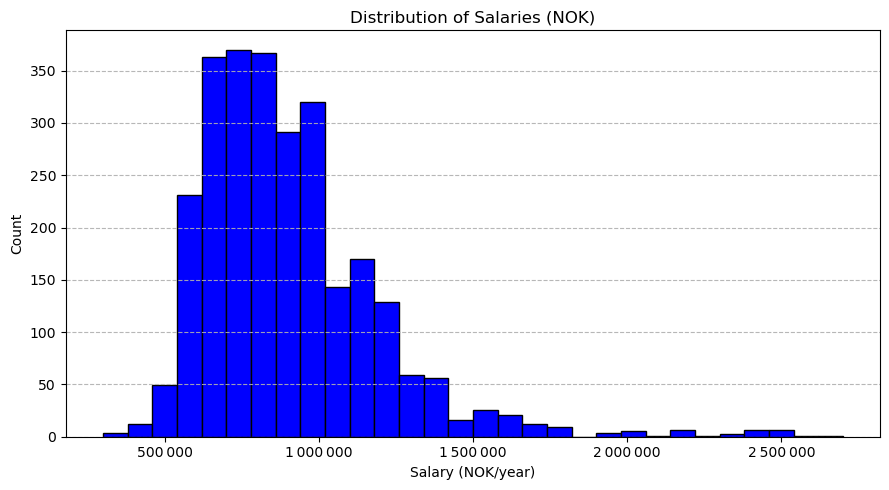

In [73]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(9, 5))
plt.hist(df['salary'], bins=30, color='blue', edgecolor='black')

plt.title('Distribution of Salaries (NOK)')
plt.xlabel('Salary (NOK/year)')
plt.ylabel('Count')

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", " ")))

plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()



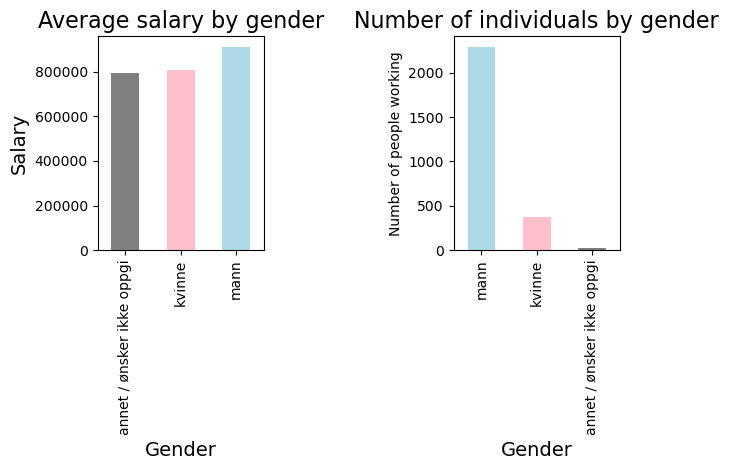

In [74]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2)

# Comparing average salary and gender
avrg_salary = df.groupby('gender')['salary'].mean()
avrg_salary.plot(kind='bar', color=['grey', 'pink', 'lightblue'], ax=axes[0])
axes[0].set_title('Average salary by gender', size=16)
axes[0].set_xlabel('Gender', size=14)
axes[0].set_ylabel('Salary', size= 14)

# Comparing amount of men vs. women working in the industry
gender_counts = df.gender.value_counts()
gender_counts.plot(kind='bar', color=['lightblue', 'pink', 'grey'])
axes[1].set_title('Number of individuals by gender', size=16)
axes[1].set_xlabel('Gender', size=14)
axes[1].set_ylabel('Number of people working')

plt.tight_layout(w_pad=9)


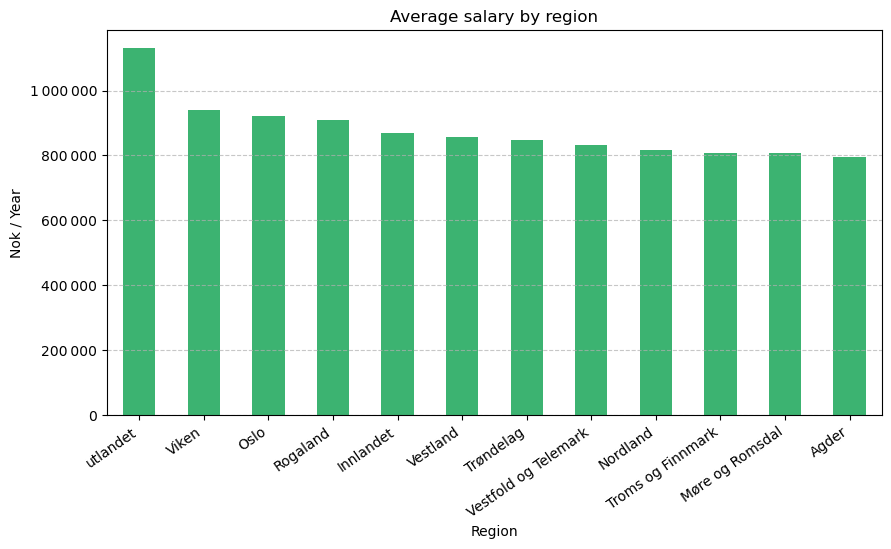

In [75]:
salary_region = df.groupby('region')['salary'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
salary_region.plot(kind='bar', color='mediumseagreen', ax=ax)

ax.set_title('Average salary by region')
ax.set_ylabel('Nok / Year')
ax.set_xlabel('Region')
ax.set_xticklabels(salary_region.index, rotation=35, ha='right')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", " ")))
ax.grid(axis='y', linestyle='--', alpha=0.7)


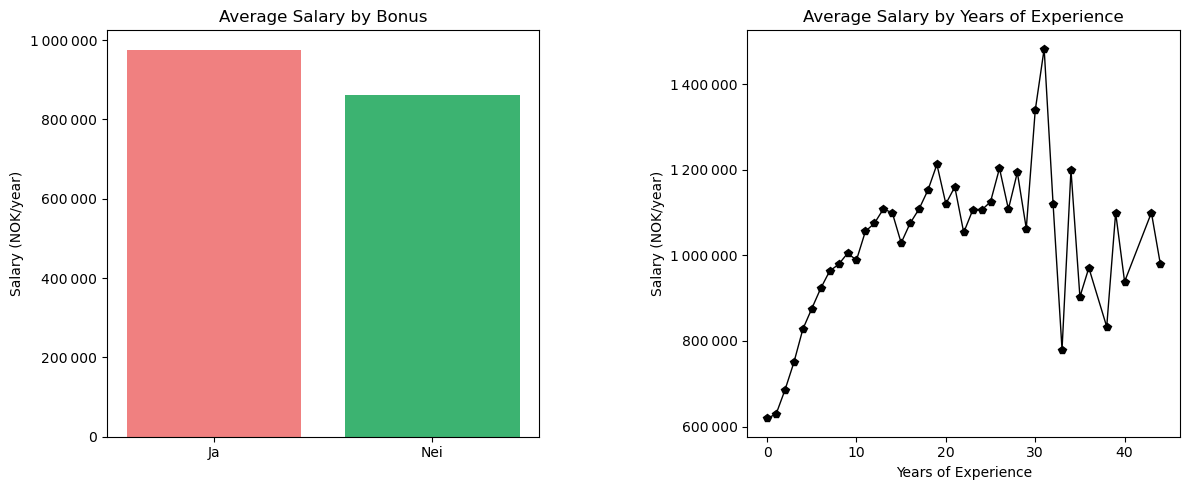

In [76]:
bonus_avrg_salary = df.groupby('bonus')['salary'].mean()
exp_avrg_salary = df.groupby('experience_years')['salary'].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(bonus_avrg_salary.index, bonus_avrg_salary.values,
            color=['lightcoral', 'mediumseagreen'])
axes[0].set_title('Average Salary by Bonus')
axes[0].set_ylabel('Salary (NOK/year)')
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", " ")))

axes[1].plot(exp_avrg_salary.index, exp_avrg_salary.values,
             color='black', marker='p', linewidth=1)
axes[1].set_title('Average Salary by Years of Experience')
axes[1].set_xlabel('Years of Experience')
axes[1].set_ylabel('Salary (NOK/year)')
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", " ")))

plt.tight_layout(w_pad=8)


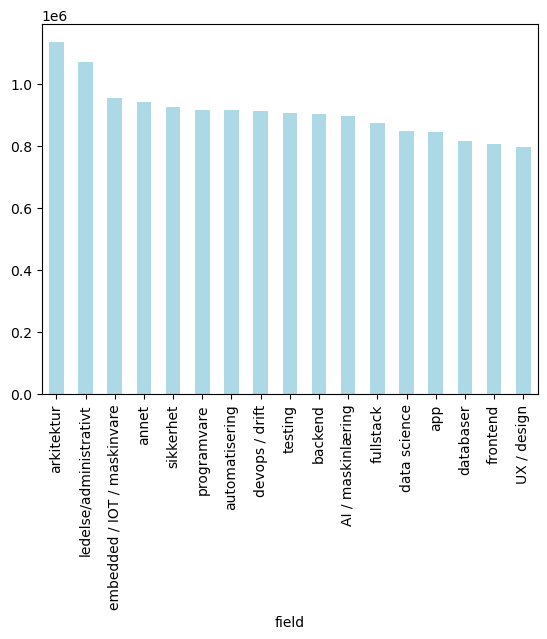

In [77]:
avrg_by_field = df.groupby('field')['salary'].mean().sort_values(ascending=False).plot(kind='bar', color='lightblue')

# Pre-processing

In [78]:
df2 = df.copy()

In [79]:
df2.isnull().sum()

gender              0
education_level     0
experience_years    0
region              0
employment_type     0
field               0
salary              0
bonus               0
dtype: int64

In [80]:
df2.drop_duplicates(inplace=True)

### **Encoding categorical variables**

In [81]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [82]:
# Automatize the encoding by using a For loop.
variables_ohe = ['gender', 'employment_type', 'bonus']

for column in variables_ohe:
    onehot = OneHotEncoder(dtype=int,
                           sparse_output=False)
    encoded= onehot.fit_transform(df2[[column]])
    encoded_df = pd.DataFrame(encoded, columns=onehot.get_feature_names_out([column]), index=df2.index)
    df2= pd.concat([df2, encoded_df], axis=1)
    df2.drop(columns=column, inplace=True)

In [83]:
# Automatize the encoding by using again a For loop.
variables_oe = ['region', 'field']

for column in variables_oe:
    encoder = OrdinalEncoder(dtype=int)
    encoded = encoder.fit_transform(df2[[column]])
    df2[column] = encoded

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ["education_level", "experience_years"]
df2[num_cols] = scaler.fit_transform(df2[num_cols])

In [85]:
df2.shape

(2645, 14)

In [86]:
df2.head()

,education_level,experience_years,region,field,salary,gender_annet / ønsker ikke oppgi,gender_kvinne,gender_mann,employment_type_frilans / selvstendig næringsdrivende,"employment_type_in-house, offentlig/kommunal sektor","employment_type_in-house, privat sektor",employment_type_konsulent,bonus_Ja,bonus_Nei
0,-0.042983,-0.213092,0,0,865000,0,0,1,0,0,1,0,0,1
1,0.306829,-0.855770,3,0,756000,0,0,1,0,1,0,0,0,1
2,-0.042983,2.743227,4,0,1500000,0,0,1,0,0,0,1,0,1
3,0.306829,2.100549,4,0,1200000,0,0,1,0,0,0,1,0,1
4,1.706077,1.200800,4,0,1200000,0,0,1,0,0,1,0,0,1


# Feature Engineering

Feature engineering was considered, such as grouping experience_years in levels or log-transforming the target variable. However, I decide to keep the dataset as it is. But I explain some ideas I had on the next code block.

In [87]:
# Feature engineering ideas ( not used to train the models):

# 1. Group 'experience_years' into categories

# df2["experience_level"] = pd.cut(
#     df2["experience_years"],
#     bins=[0, 2, 5, 10, 20, 40],
#     labels=["Entry", "Junior", "Mid", "Senior", "Expert"]
# )


# 2. Log-transform the target variable 'salary'

# df2["salary_log"] = np.log1p(df2["salary"]) 

# Separate X / y

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = df2.drop(columns=['salary'])
y = df2['salary']

In [90]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (2116, 13)
Test shape: (529, 13)


# Model Development

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import numpy as np

### Training, predict and evaluate pipeline

Creating a simple functions to train, predict and evaluate model performance

In [93]:
def model_training(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def predict_evaluate(model, X_test, y_test, model_name="name of the model"):
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n*** {model_name} model evaluation ***\n")
    print(f" \t- MAE : {mae:.0f}")
    print(f" \t- RMSE: {rmse:.0f}")
    print(f" \t- R²  : {r2:.2f}")

### Linear Regression Model

In [94]:
linear_trained = model_training(LinearRegression(), X_train, y_train)
predict_evaluate(linear_trained, X_test, y_test, model_name='Linear Regression')


*** Linear Regression model evaluation ***

 	- MAE : 157744
 	- RMSE: 237759
 	- R²  : 0.40


### Random Forest Regressor model

In [95]:
rforest_trained = model_training(RandomForestRegressor(), X_train, y_train)
predict_evaluate(rforest_trained, X_test, y_test, model_name='Random Forest Regressor')


*** Random Forest Regressor model evaluation ***

 	- MAE : 138536
 	- RMSE: 216973
 	- R²  : 0.50


### SVM model

In [96]:
svm_trained = model_training(SVR(), X_train, y_train)
predict_evaluate(svm_trained, X_test, y_test, model_name='SVM')


*** SVM model evaluation ***

 	- MAE : 215581
 	- RMSE: 312950
 	- R²  : -0.05


# Model Optimization

In [97]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def eval_model(name, model, X_te, y_te):
    y_pred = model.predict(X_te)
    mae  = mean_absolute_error(y_te, y_pred)
    rmse = mean_squared_error(y_te, y_pred, squared=False)
    r2   = r2_score(y_te, y_pred)
    print(f"\n{name}")
    print(f" MAE : {mae:,.0f}")
    print(f" RMSE: {rmse:,.0f}")
    print(f" R²  : {r2:.3f}")
    return mae, rmse, r2

cv= KFold(n_splits=5, shuffle=True, random_state=42)
scoring = "neg_mean_absolute_error"

print("*** HYPERPARAMETER TUNING ***")

# Random Forest TUNING
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
param_rf = {
    "n_estimators": [200, 400, 600, 800, 1000],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]}

rf_search = RandomizedSearchCV(
    rf, param_rf, n_iter=30, cv=cv, scoring=scoring,
    n_jobs=-1, random_state=42, verbose=0)

rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_
print("Best RF params:", rf_search.best_params_)
eval_model("Random Forest (tuned)", rf_best, X_test, y_test)

# SVR TUNING
svr = SVR()
param_svr = {
    "C": [0.1, 1, 10, 100],
    "epsilon": [0.01, 0.1, 0.5, 1],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]}

svr_search = RandomizedSearchCV(
    svr, param_svr, n_iter=20, cv=cv, scoring=scoring,
    n_jobs=-1, random_state=42, verbose=0)

svr_search.fit(X_train, y_train)
svr_best = svr_search.best_estimator_
print("Best SVR params:", svr_search.best_params_)
eval_model("SVR (tuned)", svr_best, X_test, y_test)


*** HYPERPARAMETER TUNING ***
Best RF params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}

Random Forest (tuned)
 MAE : 134,745
 RMSE: 212,175
 R²  : 0.519


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best SVR params: {'kernel': 'linear', 'gamma': 'auto', 'epsilon': 0.5, 'C': 100}

SVR (tuned)
 MAE : 178,245
 RMSE: 278,522
 R²  : 0.171


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(178244.86798659584, 278521.89568573004, 0.1712997961134729)

# Visualization Comparision

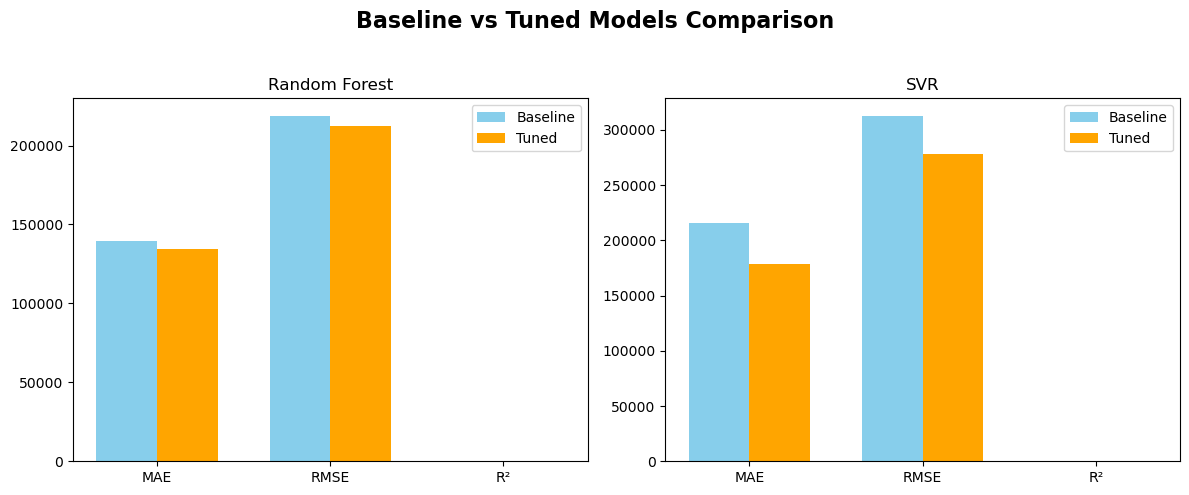

In [98]:
import matplotlib.pyplot as plt
import numpy as np

rf_baseline = [139240, 218958, 0.49]
rf_tuned    = [134745, 212175, 0.52]
svr_baseline = [215581, 312950, -0.05]
svr_tuned    = [178245, 278522, 0.17]

metrics = ["MAE", "RMSE", "R²"]
x = np.arange(len(metrics))
width = 0.35
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Baseline vs Tuned Models Comparison", fontsize=16, weight="bold")

axs[0].bar(x - width/2, rf_baseline, width, label="Baseline", color="skyblue")
axs[0].bar(x + width/2, rf_tuned, width, label="Tuned", color="orange")
axs[0].set_title("Random Forest")
axs[0].set_xticks(x)
axs[0].set_xticklabels(metrics)
axs[0].legend()

axs[1].bar(x - width/2, svr_baseline, width, label="Baseline", color="skyblue")
axs[1].bar(x + width/2, svr_tuned, width, label="Tuned", color="orange")
axs[1].set_title("SVR")
axs[1].set_xticks(x)
axs[1].set_xticklabels(metrics)
axs[1].legend()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


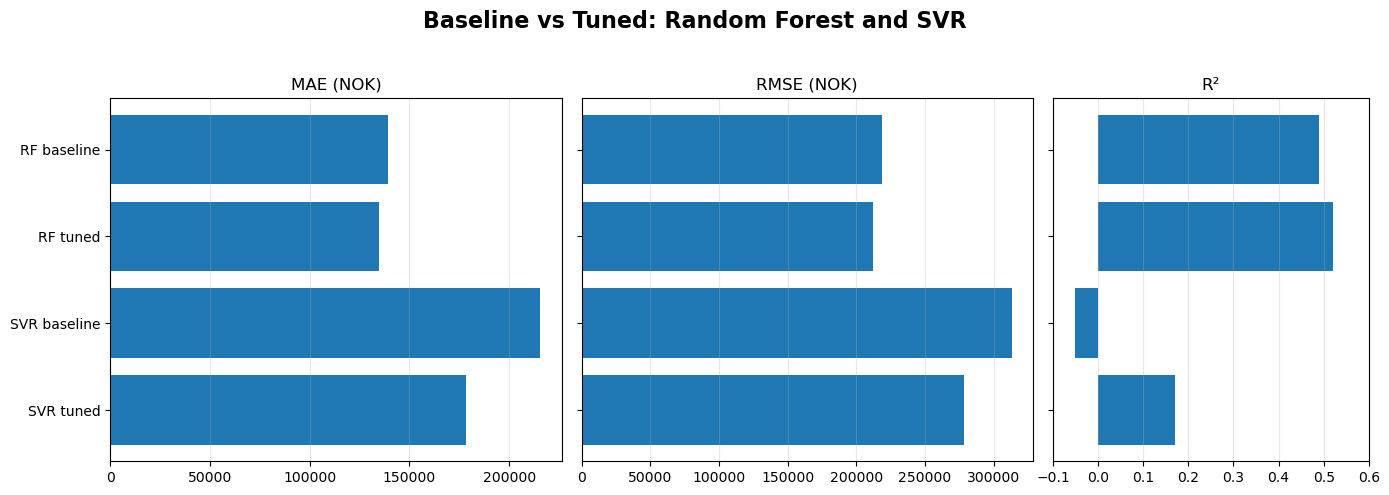

In [99]:
labels = ["RF baseline", "RF tuned", "SVR baseline", "SVR tuned"]
mae =  [139240, 134745, 215581, 178245]
rmse = [218958, 212175, 312950, 278522]
r2   = [0.49,   0.52,   -0.05,   0.17  ]

y = np.arange(len(labels))
fig, axs = plt.subplots(1, 3, figsize=(14, 5), gridspec_kw={'width_ratios':[1,1,0.7]})
fig.suptitle("Baseline vs Tuned: Random Forest and SVR", fontsize=16, weight="bold")

axs[0].barh(y, mae)
axs[0].set_yticks(y)
axs[0].set_yticklabels(labels)
axs[0].invert_yaxis()
axs[0].set_title("MAE (NOK)")
axs[0].grid(axis="x", alpha=0.3)

axs[1].barh(y, rmse)
axs[1].set_yticks(y)
axs[1].set_yticklabels([])
axs[1].invert_yaxis()
axs[1].set_title("RMSE (NOK)")
axs[1].grid(axis="x", alpha=0.3)

axs[2].barh(y, r2)
axs[2].set_yticks(y)
axs[2].set_yticklabels([])
axs[2].invert_yaxis()
axs[2].set_title("R²")
axs[2].set_xlim(-0.1, 0.6)
axs[2].grid(axis="x", alpha=0.3)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()
